**Business Questions:**
- Which menu items generate the highest total revenue?
- Which products are the most frequently purchased by customers?
- Which items have the highest average selling price?
- How do sales differ between Takeaway and In-Store orders?

# Step 1: Import Libraries

In [1]:
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For data visualisation
import numpy as np  # For handling missing values
import seaborn as sns

# Step 2: Load the Dataset

In [2]:
# Load the dataset

sales = pd.read_csv('dirty_cafe_sales.csv', index_col = 'Transaction ID')

In [3]:

# Display the first few rows
print('\nDataset Preview:')
sales



Dataset Preview:


,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
Transaction ID,,,,,,,
TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...
TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02


# Step 3: Inspect the Dataset

In [4]:
# Get dataset information
print('\nDataset Info:')
sales.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, TXN_1961373 to TXN_6170729
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Item              9667 non-null   object
 1   Quantity          9862 non-null   object
 2   Price Per Unit    9821 non-null   object
 3   Total Spent       9827 non-null   object
 4   Payment Method    7421 non-null   object
 5   Location          6735 non-null   object
 6   Transaction Date  9841 non-null   object
dtypes: object(7)
memory usage: 625.0+ KB


In [113]:
# Check for missing values
sales.isnull().sum()

Item                333
Quantity            479
Price Per Unit      533
Total Spent         502
Payment Method        0
Location              0
Transaction Date    460
dtype: int64

In [116]:
#summary statistics. Drop Transaction date as it is not neccessary in summary statistics
sales.drop(columns = ['Transaction Date']).describe()

,Quantity,Price Per Unit,Total Spent
count,9521.000000,9467.000000,9498.000000
mean,3.028463,2.949984,8.924352
std,1.419007,1.278450,6.009919
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


 # Step 4: Fix data types

In [6]:
# convert Quantity, Price Per Unit, Total Spent to numeric

sales['Quantity'] = pd.to_numeric(sales['Quantity'], errors = 'coerce')
sales['Price Per Unit'] = pd.to_numeric(sales['Price Per Unit'], errors = 'coerce')
sales['Total Spent'] = pd.to_numeric(sales['Total Spent'], errors = 'coerce')


# convert transaction date
sales['Transaction Date'] = pd.to_datetime(sales['Transaction Date'], errors = 'coerce')
#sales
print('\nUpdated Data types:')
sales.dtypes


Updated Data types:


Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object

 # Step 5: Handle Missing Values

In [9]:
# Check for distict values
print(sales['Payment Method'].unique())
print(sales['Location'].unique())

['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]
['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']


In [10]:
# Standadize values to one value 'Unknown'
sales['Payment Method'] = sales['Payment Method'].replace(['UNKNOWN', 'ERROR'], 'UNKNOWN')
sales['Location'] = sales['Location'].replace(['UNKNOWN', 'ERROR'], 'UNKNOWN')
sales['Payment Method'] = sales['Payment Method'].fillna('UNKNOWN')
sales['Location'] = sales['Location'].fillna('UNKNOWN')

In [11]:

print('\nUpdated Values for Columns:')
print(sales['Payment Method'].unique())
print(sales['Location'].unique())


Updated Values for Columns:
['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet']
['Takeaway' 'In-store' 'UNKNOWN']


In [12]:
# fill columns 'Quantity', 'Price per unit', 'Total Spent' given that

# Create a copy of dataframe

sales2 = sales.copy()

# Case 1: Missing quantity, but have price and total spent **mask will evaluate to either true or false
mask = sales2['Quantity'].isna() & sales2['Total Spent'].notna() & sales2['Price Per Unit'].notna() 
sales2.loc[mask, 'Quantity'] = sales2.loc[mask,'Total Spent'] / sales2.loc[mask, 'Price Per Unit']

# Case 2: Missing price per unit, but have quantity and total spent
mask = sales2['Price Per Unit'].isna() & sales2['Quantity'].notna() & sales2['Total Spent'].notna()
sales2.loc[mask, 'Price Per Unit'] = sales2.loc[mask, 'Total Spent'] / sales2.loc[mask, 'Quantity']

# Case 3: Missing total spent, but have quantity and price per unit **mask will evaluate to True or False
mask = sales2['Total Spent'].isna() & sales2['Quantity'].notna() & sales2['Price Per Unit'].notna()
sales2.loc[mask, 'Total Spent'] = sales2.loc[mask, 'Quantity'] * sales2.loc[mask, 'Price Per Unit']

In [13]:
#sales2

sales2.isnull().sum()

Item                333
Quantity             38
Price Per Unit       38
Total Spent          40
Payment Method        0
Location              0
Transaction Date    460
dtype: int64

In [14]:
sales2['Total Spent'].unique()

array([ 4. , 12. , 10. , 20. ,  9. , 16. , 15. , 25. ,  8. ,  5. ,  3. ,
        6. ,  2. ,  nan,  1. ,  7.5,  4.5,  1.5])

In [102]:
sales2.head(100)

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
Transaction ID,,,,,,,
TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...
TXN_8268061,Salad,3.0,5.0,15.0,UNKNOWN,Takeaway,2023-08-20
TXN_5220895,Salad,5.0,5.0,25.0,Cash,In-store,2023-06-10
TXN_3085509,Coffee,4.0,2.0,8.0,Digital Wallet,In-store,2023-04-15


In [15]:
columns_to_check = ['Quantity', 'Price Per Unit', 'Total Spent']
rows_with_nans_mask = sales2[columns_to_check].isna().any(axis=1)
rows_with_nans = sales2[rows_with_nans_mask]
nan_locations = rows_with_nans[columns_to_check].isna()

pd.concat([rows_with_nans, nan_locations], axis=1)

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Quantity,Price Per Unit,Total Spent
Transaction ID,,,,,,,,,,
TXN_4987129,Sandwich,3.0,NaN,NaN,UNKNOWN,In-store,2023-10-20,False,True,True
TXN_8562645,Salad,NaN,5.0,NaN,UNKNOWN,In-store,2023-05-18,True,False,True
TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15,True,False,True
TXN_9289174,Cake,NaN,NaN,12.0,Digital Wallet,In-store,2023-12-30,True,True,False
TXN_2962976,Juice,NaN,3.0,NaN,UNKNOWN,UNKNOWN,2023-03-17,True,False,True
TXN_8696094,Sandwich,NaN,4.0,NaN,UNKNOWN,Takeaway,2023-05-14,True,False,True
TXN_1575608,Sandwich,NaN,NaN,20.0,UNKNOWN,Takeaway,2023-01-05,True,True,False
TXN_7225428,Tea,NaN,NaN,3.0,Credit Card,Takeaway,2023-03-07,True,True,False
TXN_7590801,Tea,NaN,NaN,6.0,Cash,Takeaway,NaT,True,True,False


In [16]:
# Remove missing values from specific columns
# Create list of columns wishing to remove

columns_to_check = ['Quantity', 'Price Per Unit', 'Total Spent']
sales2_cleaned = sales2.dropna(subset = columns_to_check)
sales2_cleaned

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
Transaction ID,,,,,,,
TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...
TXN_7672686,Coffee,2.0,2.0,4.0,UNKNOWN,UNKNOWN,2023-08-30
TXN_9659401,NaN,3.0,1.0,3.0,Digital Wallet,UNKNOWN,2023-06-02
TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,UNKNOWN,2023-03-02


In [17]:
#Inspect newly created dataframe
#sales2_cleaned.info()
# Check for missing values
print(sales2_cleaned.isnull().sum())

Item                331
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    457
dtype: int64


In [18]:
#Check for distinct values in the items column
sales2_cleaned['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [19]:
sales2_cleaned2 = sales2_cleaned.dropna(subset = ['Item'])

In [20]:
# Ensure Nans are removed
sales2_cleaned2['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', 'ERROR', 'Juice', 'Tea'], dtype=object)

In [21]:
# Remove specific rows based on values like 'ERROR', UNKNOWN'
# Items must be removed as they will distort the data
# replace values with Nan then drop Nans

sales2_temp = sales2_cleaned2.copy()

sales2_temp['Item'] = sales2_temp['Item'].replace(['ERROR', 'UNKNOWN'], pd.NA)

sales2_cleaned = sales2_temp.dropna(subset = ['Item'])

sales2_cleaned

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
Transaction ID,,,,,,,
TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...
TXN_4766549,Smoothie,2.0,4.0,8.0,Cash,UNKNOWN,2023-10-20
TXN_7672686,Coffee,2.0,2.0,4.0,UNKNOWN,UNKNOWN,2023-08-30
TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,UNKNOWN,2023-03-02


In [22]:
# Check if unwanted values are removed
sales2_cleaned['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Sandwich',
       'Juice', 'Tea'], dtype=object)

In [129]:
#Check to see if there are still any null/missing values
sales2_cleaned.isnull().sum()

Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    415
dtype: int64

# Step 6: Remove Duplicates

In [23]:
# Check for Duplicates

duplicates = sales2_cleaned.duplicated().sum()
print(f'\nNumber of Duplicates: {duplicates}')

# Drop duplicates
sales2_cleaned = sales2_cleaned.drop_duplicates()

# Verify duplicates are reomved
print(f'Number of Duplicates Remaining: {sales2_cleaned.duplicated().sum()}')


Number of Duplicates: 354
Number of Duplicates Remaining: 0


# Step 7: Visualize the cleaned dataset

In [24]:
sales2_cleaned['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Sandwich',
       'Juice', 'Tea'], dtype=object)

Top 10 Items by Revenue:
Item
Salad       16800.0
Sandwich    13072.0
Smoothie    12800.0
Juice       10047.0
Cake         9840.0
Coffee       6818.0
Tea          4675.5
Cookie       3109.0
Name: Total Spent, dtype: float64


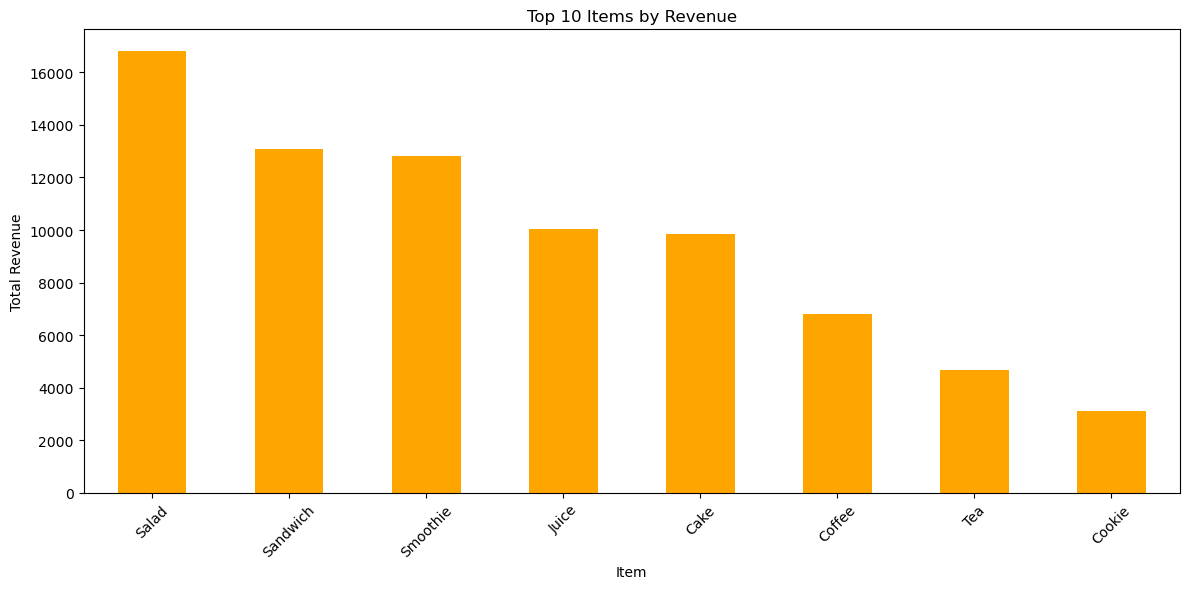

In [44]:
# Top performing products/items using Matplotlib
if 'Item' in sales2_cleaned.columns:
    top_items = sales2_cleaned.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).head(10)
    print("Top 10 Items by Revenue:")
    print(top_items)
    
    # Visualize
    plt.figure(figsize=(12, 6))
    top_items.plot(kind='bar', color='orange')
    plt.title('Top 10 Items by Revenue')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


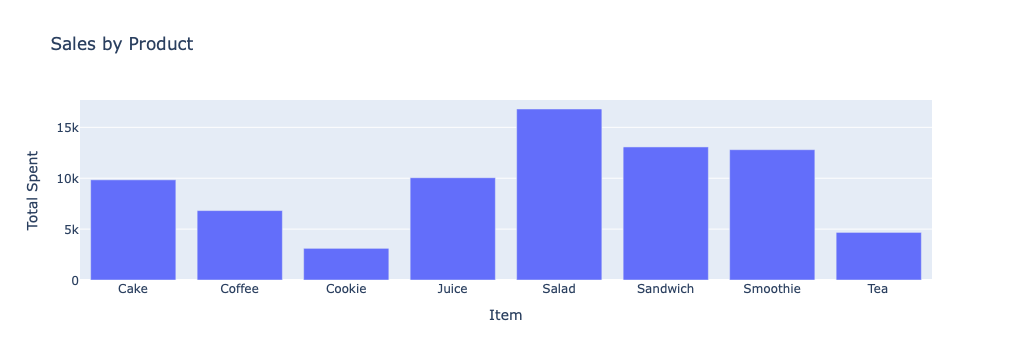

In [43]:
import plotly.express as px
import pandas as pd

# Example data
#data = {'Product': ['Coffee', 'Cake', 'Cookie', 'Smoothie'],
        #'Sales': [120, 80, 95, 60]}
#df = pd.DataFrame(data)

#fig = px.bar(df, x='Product', y='Sales', title='Sales by Product')
#fig.show()

sales_df = sales2_cleaned.groupby('Item')[['Total Spent']].sum()
sales_df

import plotly.express as px

px.bar(
    sales_df,
    #x = 'Item',
    y = 'Total Spent',
    title = 'Sales by Product'
)

#sales_df.columns

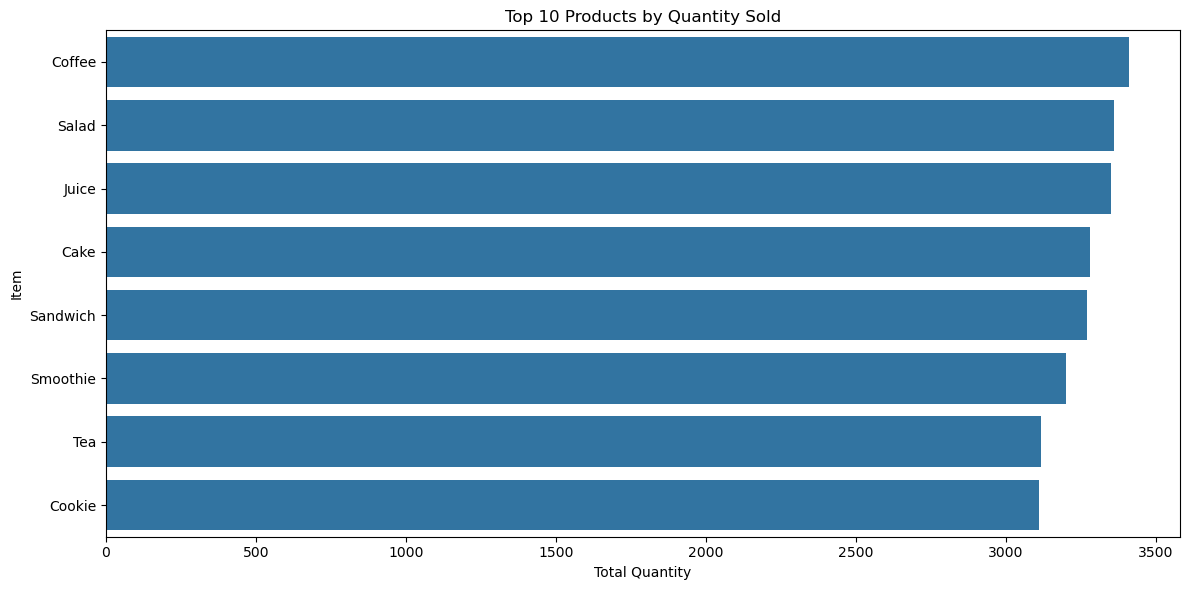

In [45]:
# Top products by quantity sold using Matplotlib
top_quantity_items = sales2_cleaned.groupby('Item')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_quantity_items.values, y=top_quantity_items.index)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity')
plt.tight_layout()
plt.show()

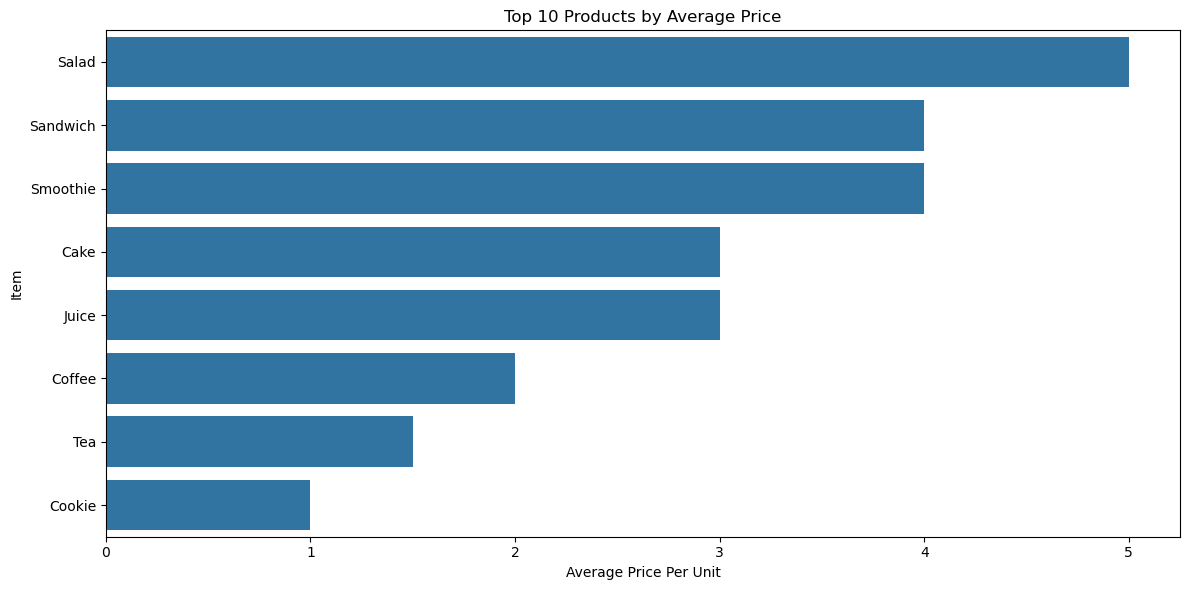

In [46]:
# Average price per product using Matplotlib
avg_price_items = sales2_cleaned.groupby('Item')['Price Per Unit'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_items.values, y=avg_price_items.index)
plt.title('Top 10 Products by Average Price')
plt.xlabel('Average Price Per Unit')
plt.tight_layout()
plt.show()

# Save DataFrame

In [28]:
sales2_cleaned.to_csv('cafe_sales_cleaned.csv', index = False)

In [29]:
pd.read_csv('cafe_sales_cleaned.csv')

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...
8620,Smoothie,2.0,4.0,8.0,Cash,UNKNOWN,2023-10-20
8621,Coffee,2.0,2.0,4.0,UNKNOWN,UNKNOWN,2023-08-30
8622,Coffee,4.0,2.0,8.0,Digital Wallet,UNKNOWN,2023-03-02
8623,Cookie,3.0,1.0,3.0,Digital Wallet,UNKNOWN,2023-12-02


# Step 7 Continuation: Create dashboards and interactive charts using plotly and dash

In [50]:
#import the saved dataset i.e. cafe_sales_cleaned
sales_new = pd.read_csv('cafe_sales_cleaned.csv', parse_dates = ['Transaction Date'])

In [51]:
#inspect the dataset
sales_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8625 entries, 0 to 8624
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Item              8625 non-null   object        
 1   Quantity          8625 non-null   float64       
 2   Price Per Unit    8625 non-null   float64       
 3   Total Spent       8625 non-null   float64       
 4   Payment Method    8625 non-null   object        
 5   Location          8625 non-null   object        
 6   Transaction Date  8353 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 471.8+ KB


In [52]:
sales2_new = sales_new.dropna()
sales2_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8353 entries, 0 to 8624
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Item              8353 non-null   object        
 1   Quantity          8353 non-null   float64       
 2   Price Per Unit    8353 non-null   float64       
 3   Total Spent       8353 non-null   float64       
 4   Payment Method    8353 non-null   object        
 5   Location          8353 non-null   object        
 6   Transaction Date  8353 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 522.1+ KB


In [54]:
sales_dataframe = sales2_new.groupby(['Item', 'Transaction Date'], as_index = False)[['Total Spent']].sum()
sales_dataframe

,Item,Transaction Date,Total Spent
0,Cake,2023-01-01,30.0
1,Cake,2023-01-02,21.0
2,Cake,2023-01-03,54.0
3,Cake,2023-01-04,12.0
4,Cake,2023-01-05,27.0
...,...,...,...
2776,Tea,2023-12-27,12.0
2777,Tea,2023-12-28,9.0
2778,Tea,2023-12-29,9.0
2779,Tea,2023-12-30,12.0


# Analyze the Total Spent on each item per period

In [56]:
sales_dataframe['Item'].unique()

array(['Cake', 'Coffee', 'Cookie', 'Juice', 'Salad', 'Sandwich',
       'Smoothie', 'Tea'], dtype=object)

In [126]:
# creating bar chart to compare sales for each product side by side
from dash import Dash, html, dcc
from dash.dependencies import Output, Input
import plotly.express as px
import pandas as pd

app = Dash(__name__)

app.layout = html.Div([
    #'Select An Item to Analyze',
    html.H1('Select A Period to Analyze'),
    dcc.DatePickerSingle(
        id = 'date picker',
        min_date_allowed = sales_dataframe['Transaction Date'].min(),
        max_date_allowed = sales_dataframe['Transaction Date'].max(),
        initial_visible_month = sales_dataframe['Transaction Date'].max(),
        date = sales_dataframe['Transaction Date'].max(),
        #display_format = 'YYYY-MM-DD',
        display_format='DD-M-YY'
    ),
    dcc.Graph(id = 'graph'),
])

@app.callback(
    Output('graph','figure'),
    Input('date picker', 'date')
)

def plot_cafe_sales_bar(date):
    fig = px.bar(
        sales_dataframe.loc[sales_dataframe['Transaction Date'].eq(date)],
        x = 'Item',
        y = 'Total Spent',
        title = f'Café Sales in {date[:10]}'
            
    )
    return fig
    
if __name__ == '__main__':
    app.run(port = 8051)

In [128]:
#this is to show for each item by all the months
import plotly.express as px
from dash import Dash, html, dcc
from dash.dependencies import Output, Input

app = Dash(__name__)

app.layout = html.Div([
    'Select An Item To Analyze: ',
    dcc.Dropdown(id = 'dropdown', options = sales_dataframe['Item'].unique()),
    dcc.Graph(id = 'visual')
])

@app.callback(
    Output('visual', 'figure'),
    Input('dropdown', 'value'),
)
def item_selector(selected_item):
    # Check if an item is selected
    if selected_item is None:
        # Return empty figure if nothing is selected
        return px.bar(title="Please select an item")
    
    # Filter data for the selected item - using the selected_item variable
    filtered_df = sales_dataframe[sales_dataframe["Item"] == selected_item]
    
    # Create the figure with the filtered data
    figure = px.bar(
        filtered_df,
        x = 'Transaction Date',
        y = 'Total Spent',
        title=f'Total Spent on {selected_item}'
    )
    return figure

if __name__ == '__main__':
    app.run(port = 8051)

In [64]:
sales_new

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...
8620,Smoothie,2.0,4.0,8.0,Cash,UNKNOWN,2023-10-20
8621,Coffee,2.0,2.0,4.0,UNKNOWN,UNKNOWN,2023-08-30
8622,Coffee,4.0,2.0,8.0,Digital Wallet,UNKNOWN,2023-03-02
8623,Cookie,3.0,1.0,3.0,Digital Wallet,UNKNOWN,2023-12-02


# Analyze payment method

In [79]:
#Inspect column by creating df
sales2_new['Payment Method'].value_counts().reset_index()

,Payment Method,count
0,UNKNOWN,2634
1,Digital Wallet,1920
2,Credit Card,1900
3,Cash,1899


In [76]:
#Create new dataframe by filtering out the unknown payment methods
payment_method = sales2_new[sales2_new['Payment Method'] != 'UNKNOWN']
payment_method

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,Smoothie,5.0,4.0,20.0,Credit Card,UNKNOWN,2023-03-31
...,...,...,...,...,...,...,...
8618,Sandwich,3.0,4.0,12.0,Cash,Takeaway,2023-02-24
8620,Smoothie,2.0,4.0,8.0,Cash,UNKNOWN,2023-10-20
8622,Coffee,4.0,2.0,8.0,Digital Wallet,UNKNOWN,2023-03-02
8623,Cookie,3.0,1.0,3.0,Digital Wallet,UNKNOWN,2023-12-02


In [77]:
#view dataframe that fliters out the unknowns
payment_method['Payment Method'].value_counts().reset_index()

,Payment Method,count
0,Digital Wallet,1920
1,Credit Card,1900
2,Cash,1899


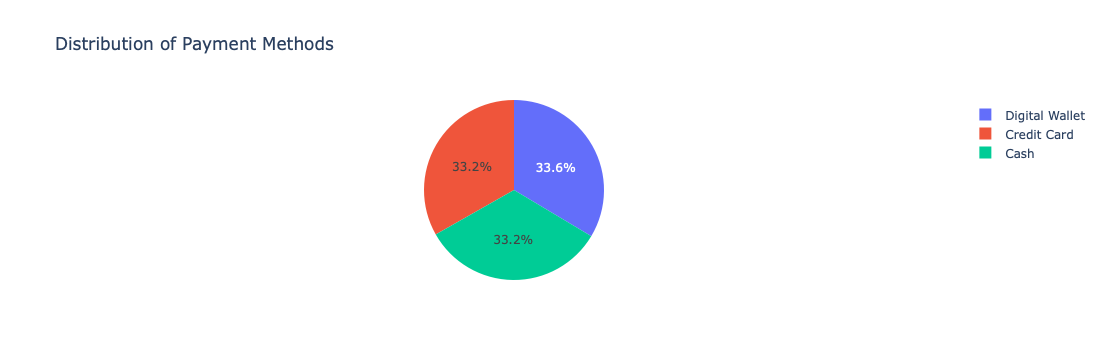

In [75]:
#Create interactive pie chart to show distribution of payment methods
px.pie(
    payment_method['Payment Method'].value_counts().reset_index(),
    values = 'count',
    names = 'Payment Method',
    title = 'Distribution of Payment Methods',

)

# Analyze Location 

In [80]:
# inspect column by using unique function
sales2_new['Location'].unique()

array(['Takeaway', 'In-store', 'UNKNOWN'], dtype=object)

In [100]:
#create new df by filtering out the 'unknowns'
location = sales2_new[sales2_new['Location'] != 'UNKNOWN']
location['Location'].value_counts().reset_index()

,Location,count
0,Takeaway,2523
1,In-store,2520


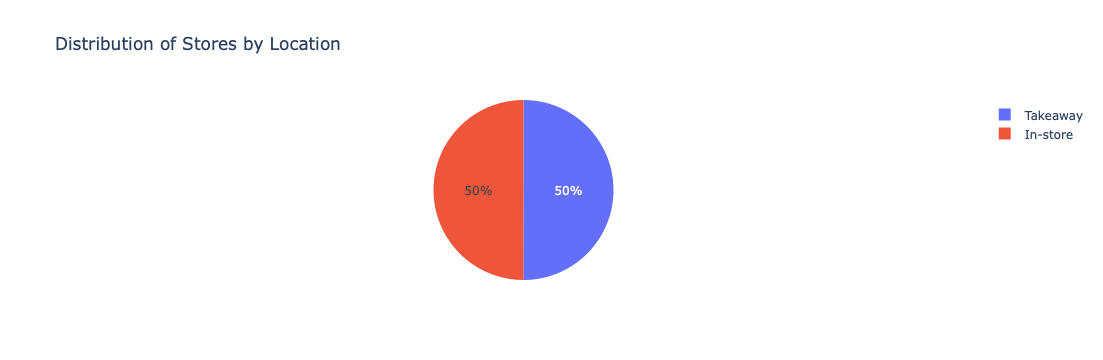

In [84]:
# create pie chart from newly created df
px.pie(
    location['Location'].value_counts().reset_index(),
    values = 'count',
    names = 'Location',
    title = 'Distribution of Stores by Location'
)

# Analyze the quantity sold by each item

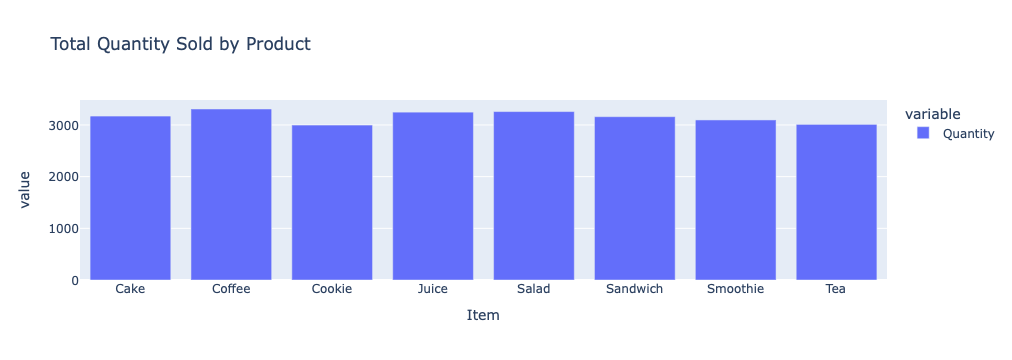

In [108]:
px.bar(
    sales2_new.groupby('Item')['Quantity'].sum(),
    title = 'Total Quantity Sold by Product'
)